In [18]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

PROJECT_ROOT = Path.cwd().parent  
DATA_DIR = PROJECT_ROOT / "data" / "processed"

print("Project root:", PROJECT_ROOT)
print("Processed dir exists:", DATA_DIR.exists())
print("Files:", list(DATA_DIR.glob("*")))

Project root: /Users/macbookpro/Desktop/demand-forecasting-e2e
Processed dir exists: True
Files: [PosixPath('/Users/macbookpro/Desktop/demand-forecasting-e2e/data/processed/bike_hour.parquet'), PosixPath('/Users/macbookpro/Desktop/demand-forecasting-e2e/data/processed/bike_day.parquet')]


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [20]:
df.describe()
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


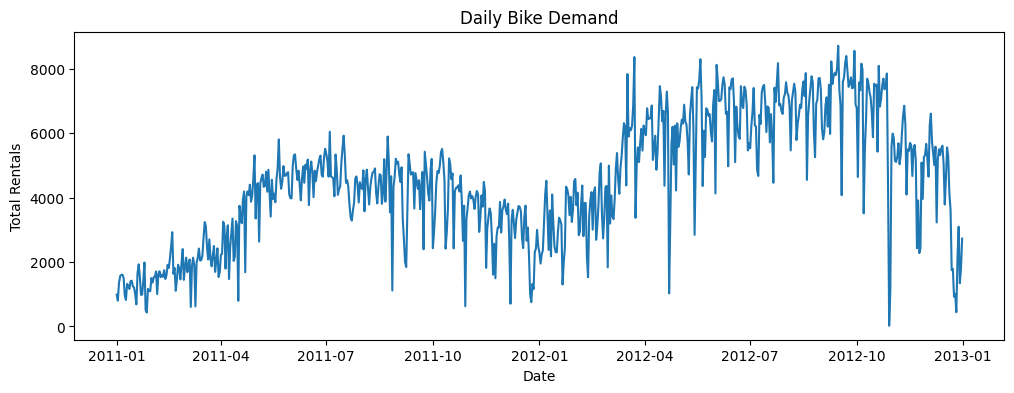

In [21]:
plt.figure(figsize=(12,4))
plt.plot(df["dteday"], df["cnt"])
plt.title("Daily Bike Demand")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.show()


In [22]:
df = df.sort_values("dteday")

train_size = int(len(df) * 0.8)

train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:]

train_df.tail(2), val_df.head(2)


(     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
 582      583 2012-08-05       3   1     8        0        0           0   
 583      584 2012-08-06       3   1     8        0        1           1   
 
      weathersit      temp     atemp       hum  windspeed  casual  registered  \
 582           1  0.769167  0.731079  0.652500   0.290421    1707        3757   
 583           2  0.752500  0.710246  0.654167   0.129354    1233        5780   
 
       cnt  
 582  5464  
 583  7013  ,
      instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
 584      585 2012-08-07       3   1     8        0        2           1   
 585      586 2012-08-08       3   1     8        0        3           1   
 
      weathersit      temp     atemp       hum  windspeed  casual  registered  \
 584           2  0.735833  0.697621  0.703750   0.116908    1278        5995   
 585           2  0.750000  0.707717  0.672917   0.110700    1263        6271   
 
       cnt

In [23]:
val_df = val_df.copy()
val_df["pred_naive"] = train_df["cnt"].iloc[-1]

from sklearn.metrics import mean_absolute_error

mae_naive = mean_absolute_error(val_df["cnt"], val_df["pred_naive"])
mae_naive
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [24]:
df["rolling_7"] = df["cnt"].shift(1).rolling(7).mean()

train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:]

val_df = val_df.copy()
val_df["pred_rolling_7"] = val_df["rolling_7"]

mae_rolling = mean_absolute_error(
    val_df.dropna()["cnt"],
    val_df.dropna()["pred_rolling_7"]
)

mae_rolling


918.6307094266276